# **Machine Learning Project #1**
## Predicting Student's Scores Using Linear Regression

---

Mohsen Shayeghi

**under the supervision of : Dr.Khosravi**


# imported several librariers that we need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
!pip install ucimlrepo

# import and fetch data

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

# data shown by Scatter plot with intensity

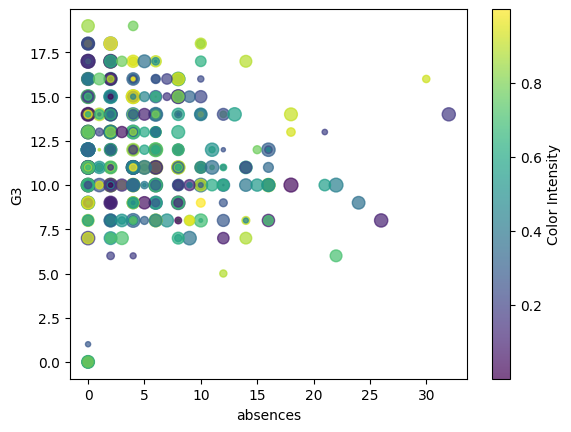

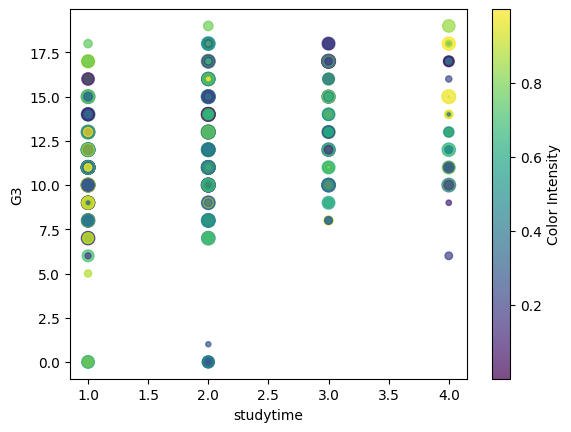

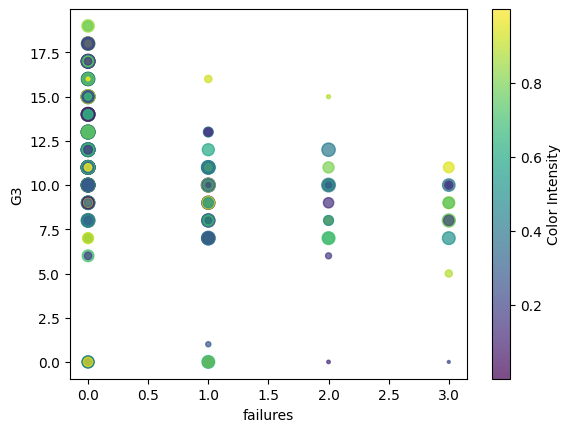

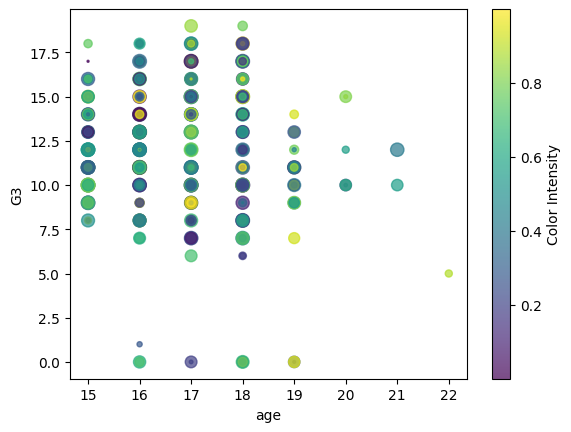

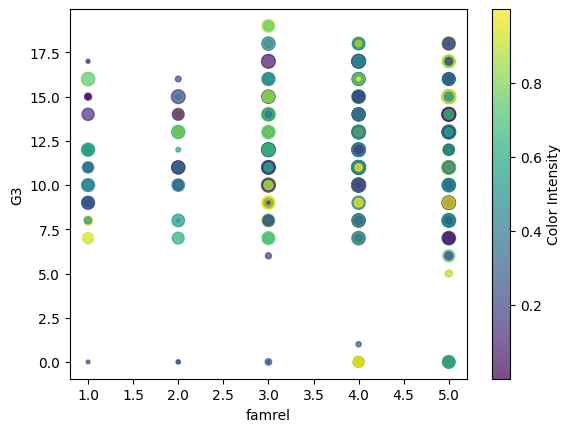

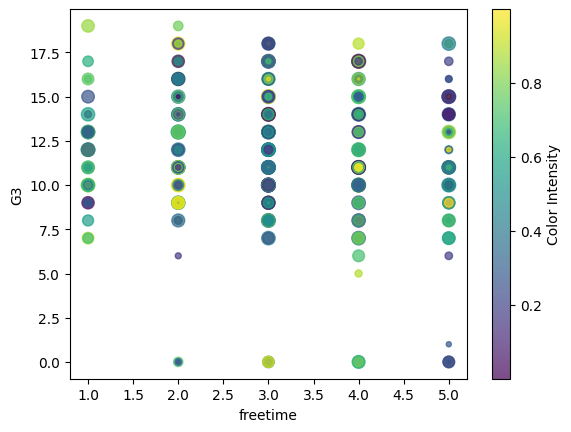

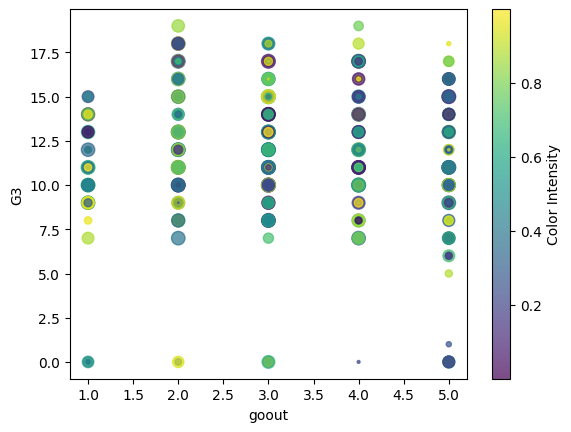

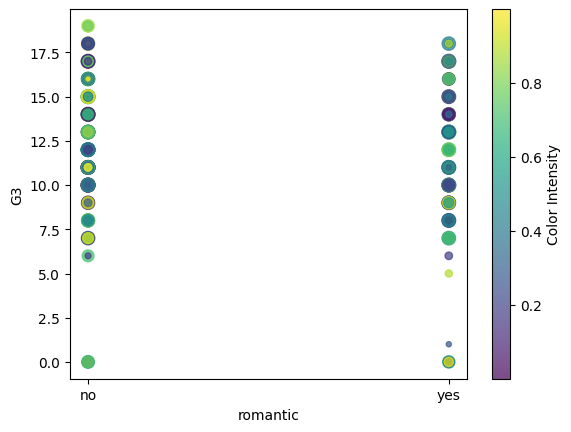

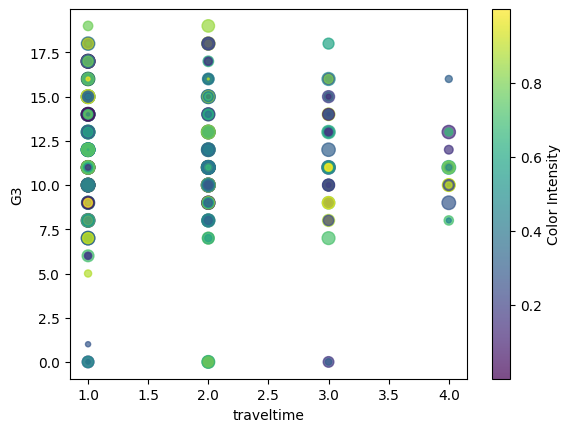

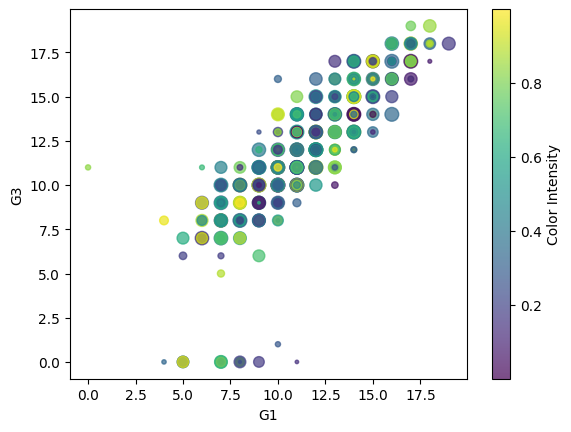

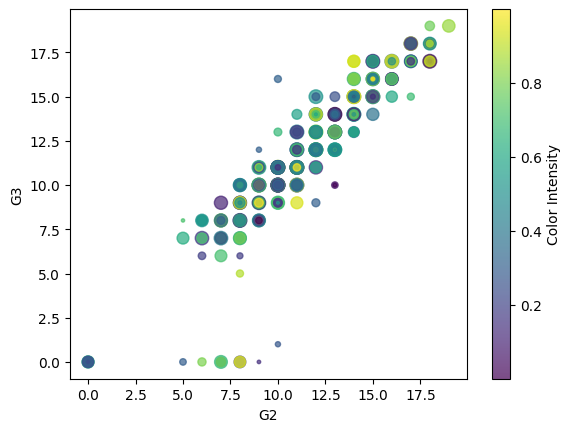

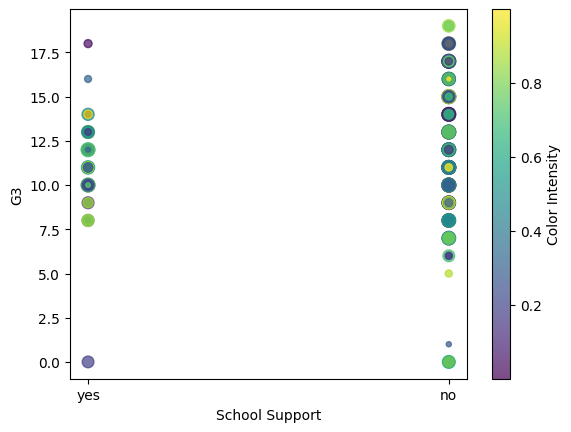

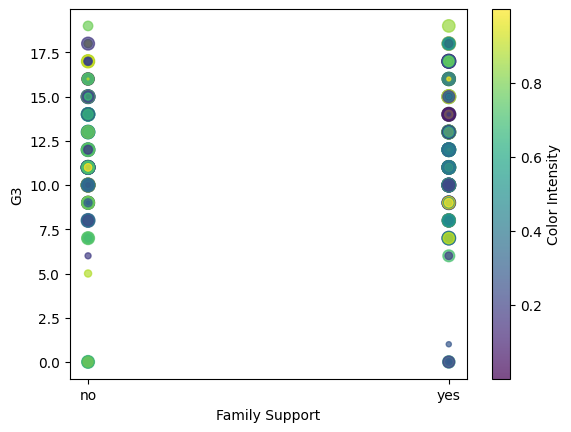

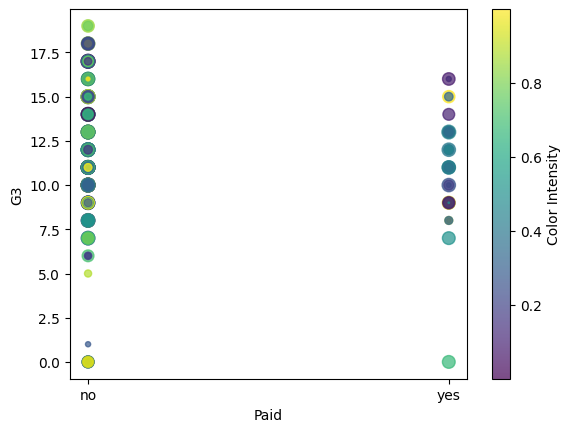

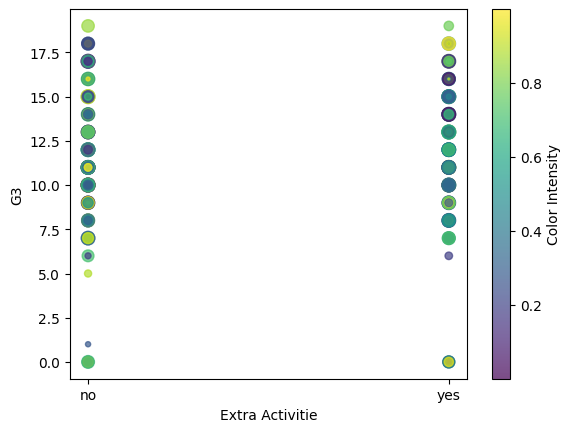

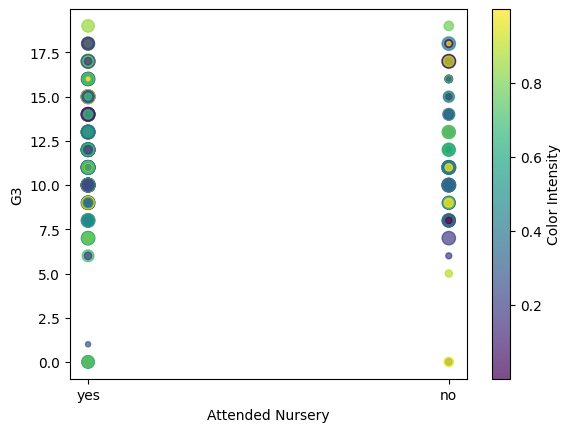

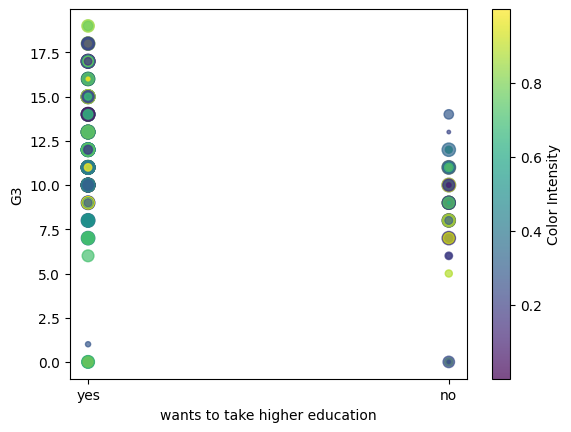

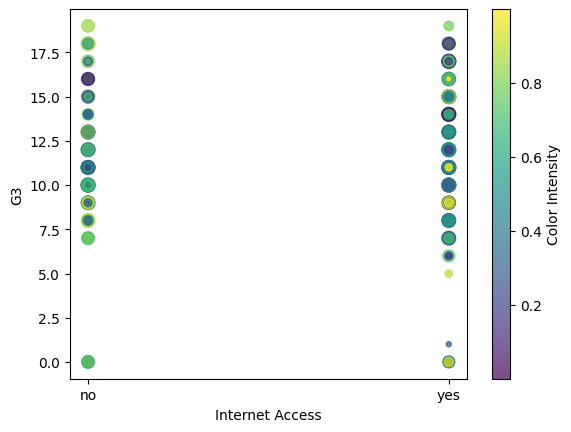

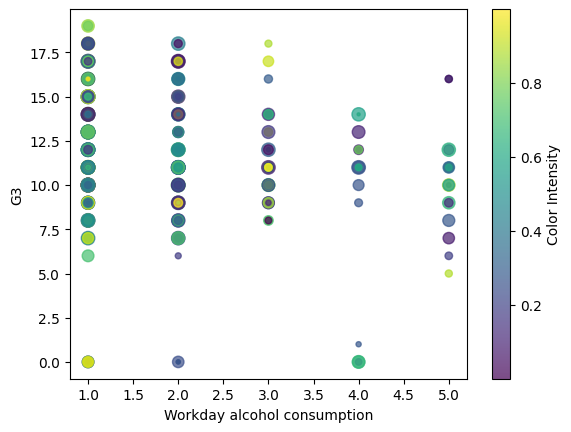

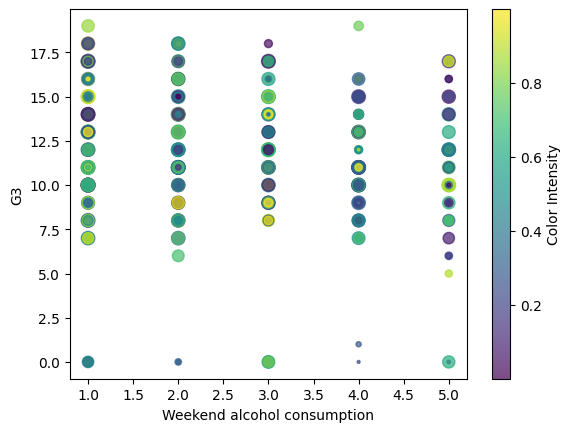

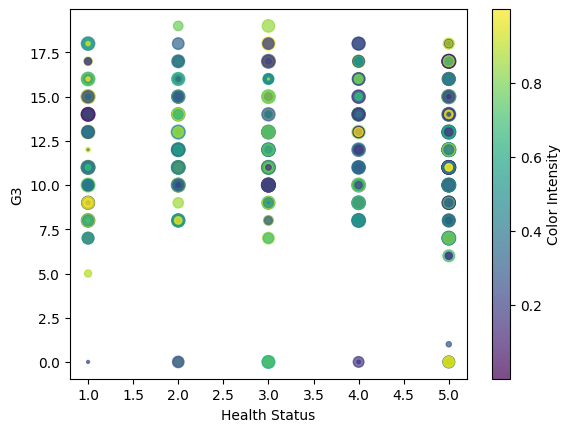

In [ ]:
colors = np.random.rand(649)
sizes = 100 *  np.random.rand(649)
plt.scatter(X['absences'], y['G3'], c=colors , s=sizes , alpha=0.7, cmap='viridis')
plt.xlabel('absences')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['studytime'], y['G3'], s=sizes , alpha=0.7 ,c=colors, cmap='viridis')
plt.xlabel('studytime')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['failures'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('failures')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['age'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('age')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['famrel'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('famrel')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['freetime'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('freetime')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['goout'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('goout')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['romantic'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('romantic')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['traveltime'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('traveltime')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(y['G1'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('G1')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(y['G2'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('G2')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['schoolsup'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('School Support')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['famsup'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('Family Support')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['paid'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('Paid')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['activities'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('Extra Activitie')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['nursery'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('Attended Nursery')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['higher'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('wants to take higher education')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['internet'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('Internet Access')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['Dalc'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('Workday alcohol consumption')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['Walc'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('Weekend alcohol consumption')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()
plt.scatter(X['health'], y['G3'],s=sizes , alpha=0.7, c=colors, cmap='viridis')
plt.xlabel('Health Status')
plt.ylabel('G3')
plt.colorbar(label='Color Intensity')
plt.show()



# data shown by Box plot


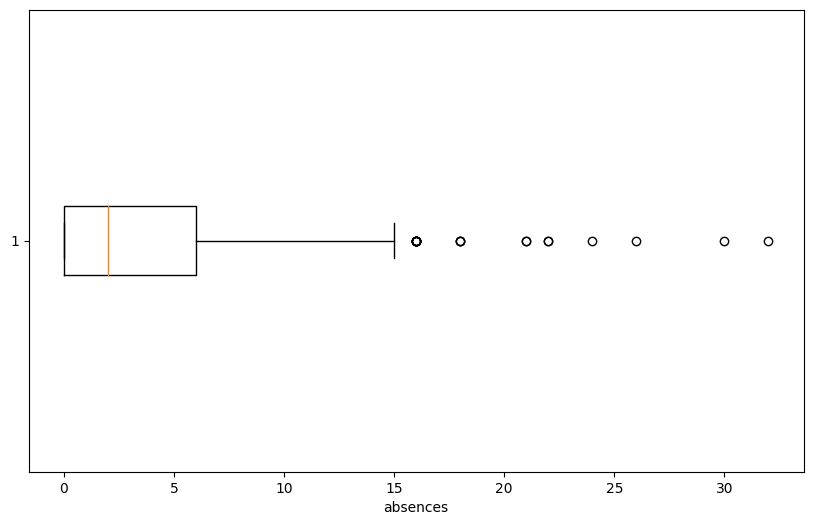

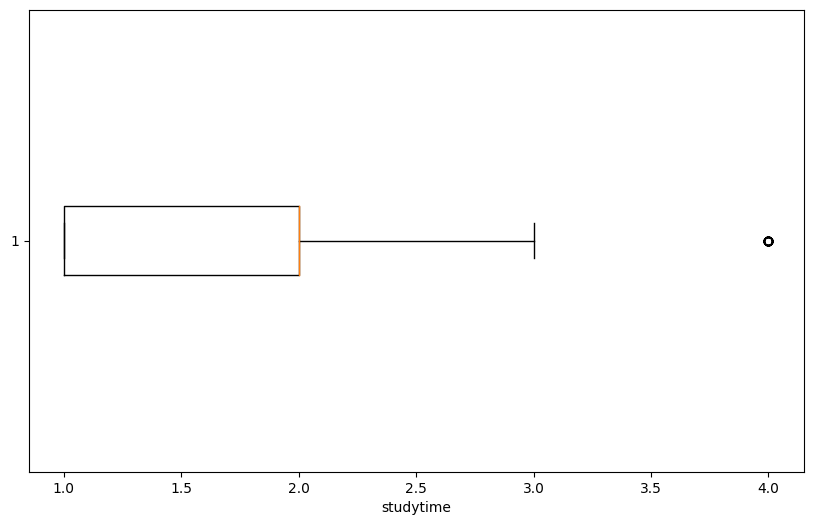

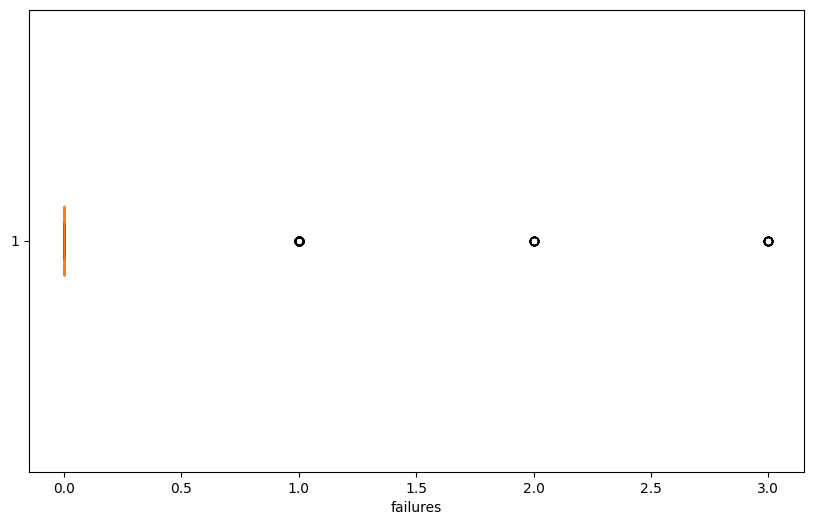

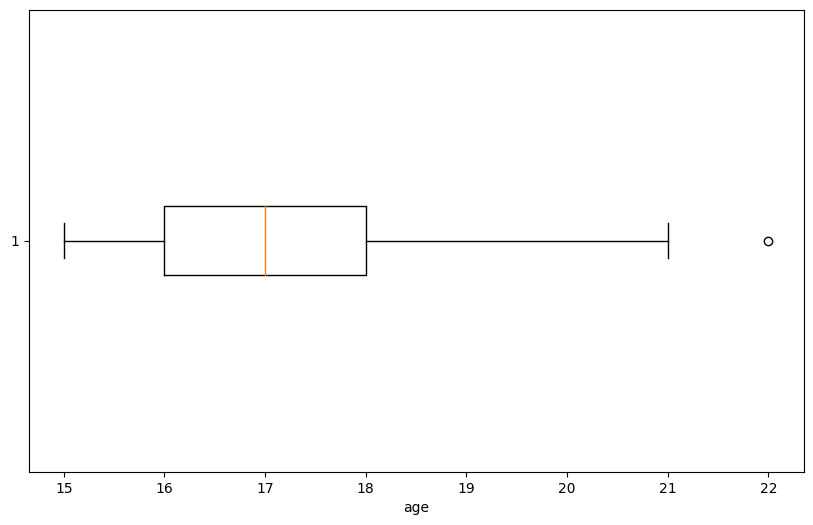

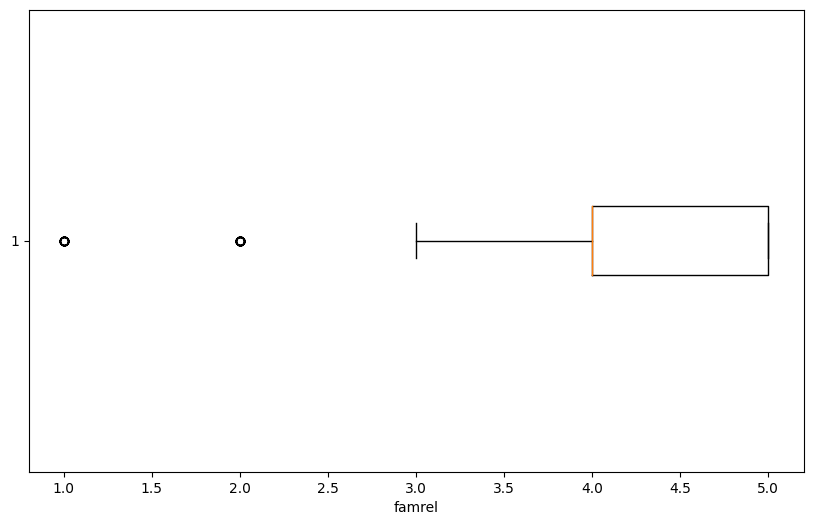

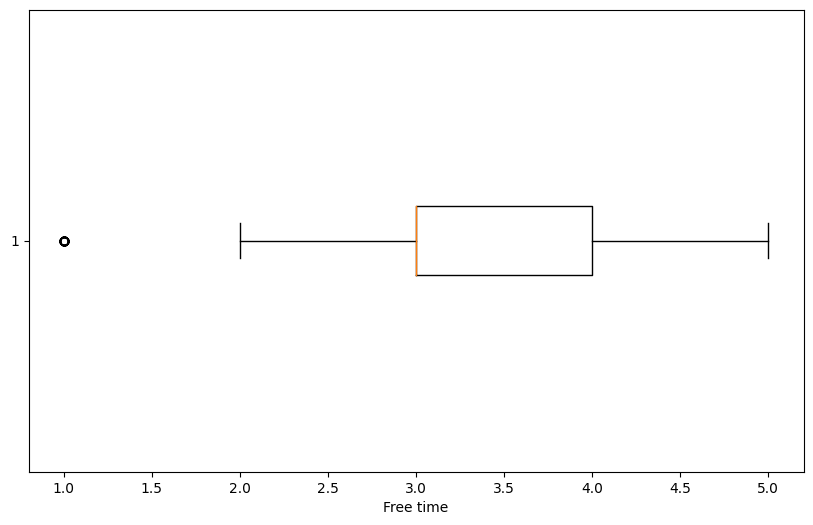

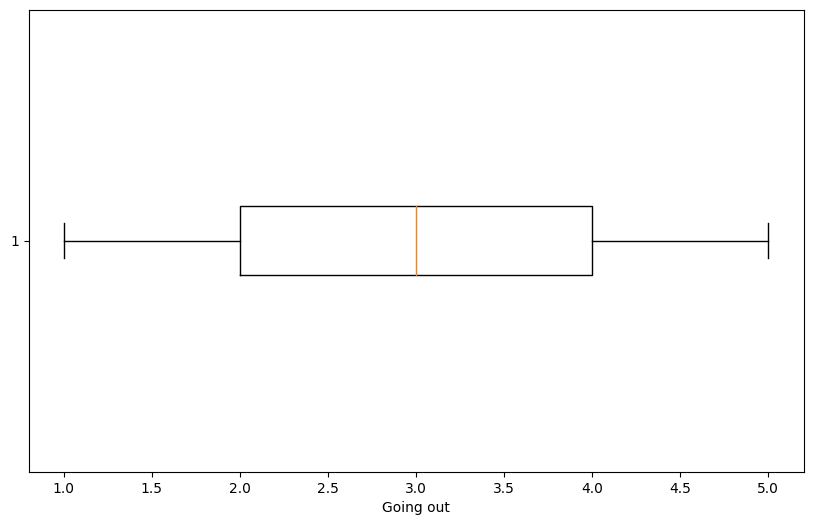

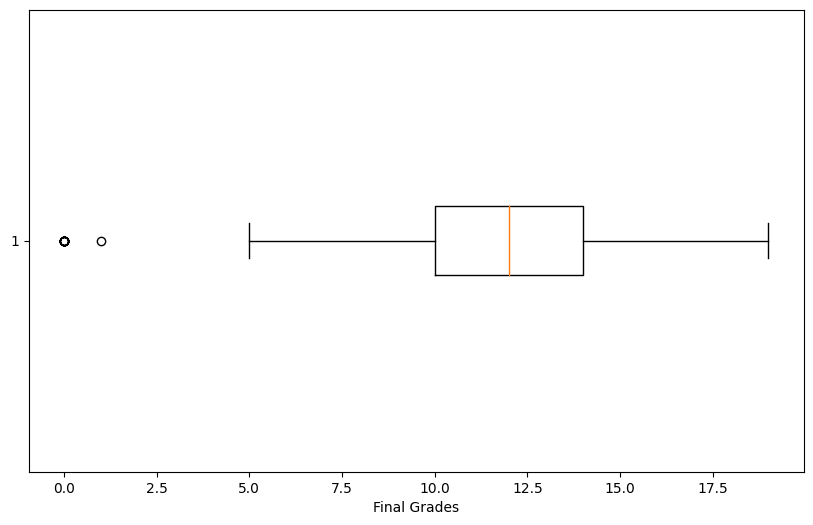

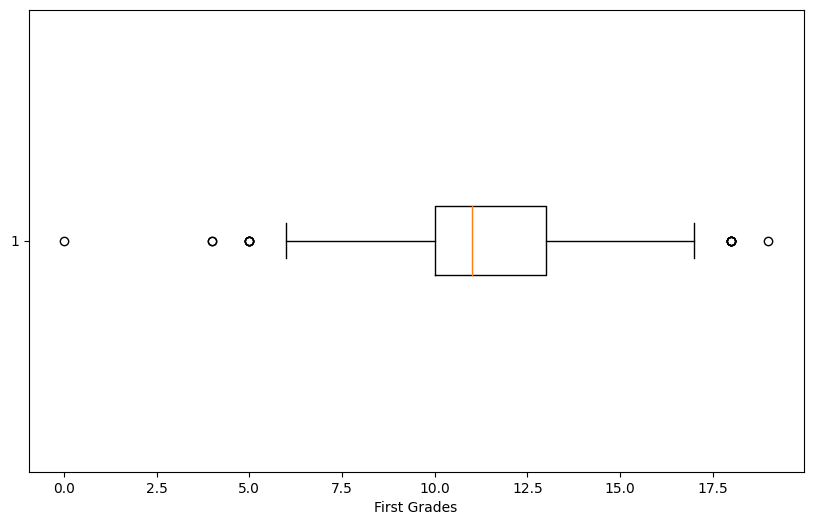

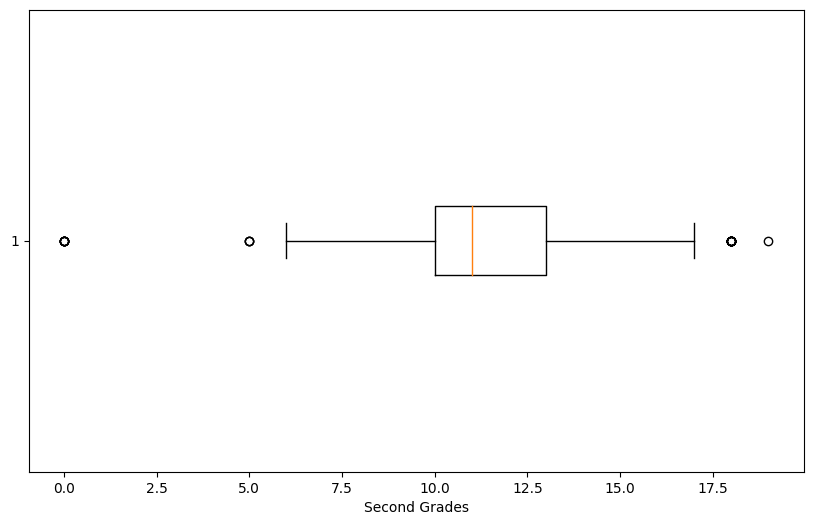

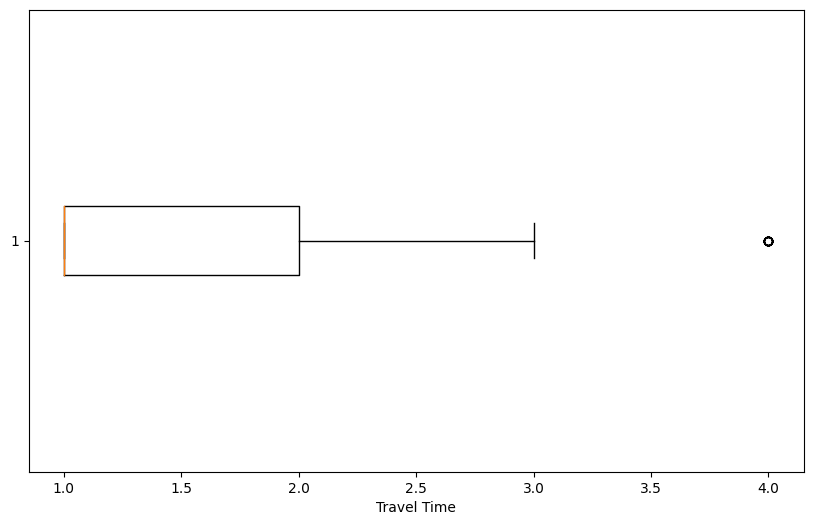

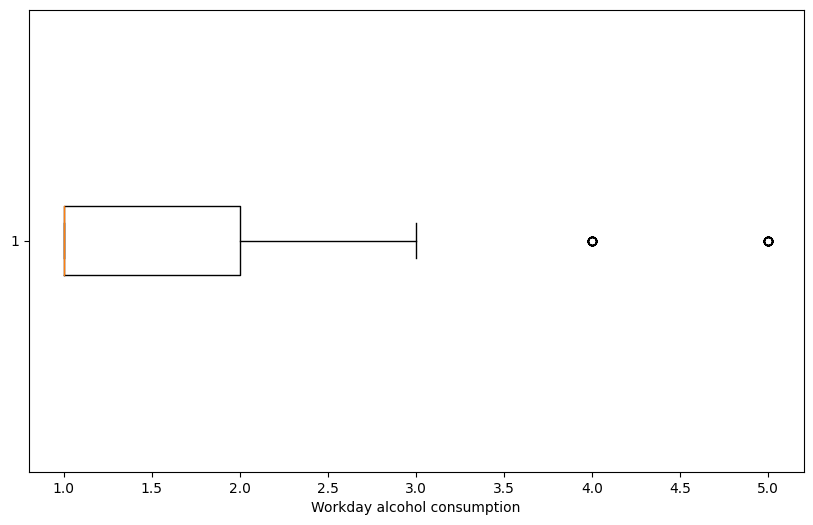

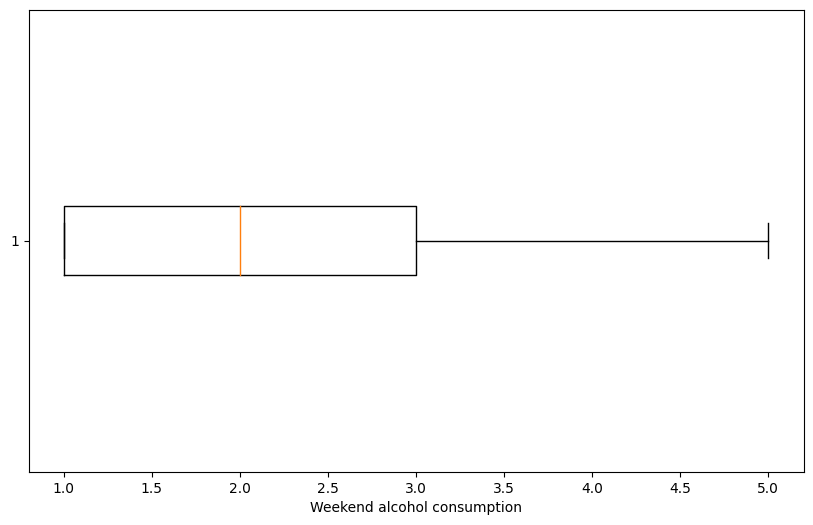

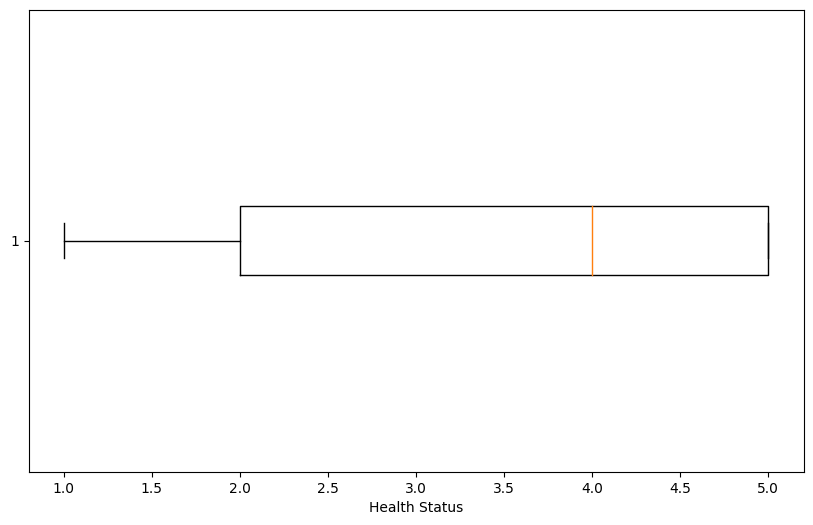

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.boxplot(X['absences'],vert=0)
plt.xlabel('absences')
plt.show()
fig = plt.figure(figsize=(10, 6))
plt.boxplot(X['studytime'],vert=0)
plt.xlabel('studytime')
plt.show()
fig = plt.figure(figsize=(10, 6))
plt.boxplot(X['failures'],vert=0)
plt.xlabel('failures')
plt.show()
fig = plt.figure(figsize=(10, 6))
plt.boxplot(X['age'],vert=0)
plt.xlabel('age')
plt.show()
fig = plt.figure(figsize=(10, 6))
plt.boxplot(X['famrel'],vert=0)
plt.xlabel('famrel')
plt.show()
fig = plt.figure(figsize=(10, 6))
plt.boxplot(X['freetime'],vert=0)
plt.xlabel('Free time')
plt.show()
fig = plt.figure(figsize=(10, 6))
plt.boxplot(X['goout'],vert=0)
plt.xlabel('Going out')
plt.show()
fig = plt.figure(figsize=(10,6))
plt.boxplot(y['G3'],vert=0)
plt.xlabel('Final Grades')
plt.show()
fig = plt.figure(figsize=(10,6))
plt.boxplot(y['G1'],vert=0)
plt.xlabel('First Grades')
plt.show()
fig = plt.figure(figsize=(10,6))
plt.boxplot(y['G2'],vert=0)
plt.xlabel('Second Grades')
plt.show()
fig = plt.figure(figsize=(10,6))
plt.boxplot(X['traveltime'],vert=0)
plt.xlabel('Travel Time')
plt.show()
fig = plt.figure(figsize=(10,6))
plt.boxplot(X['Dalc'],vert=0)
plt.xlabel('Workday alcohol consumption')
plt.show()
fig = plt.figure(figsize=(10,6))
plt.boxplot(X['Walc'],vert=0)
plt.xlabel('Weekend alcohol consumption')
plt.show()
fig = plt.figure(figsize=(10,6))
plt.boxplot(X['health'],vert=0)
plt.xlabel('Health Status')
plt.show()



# Data ploted by histogram

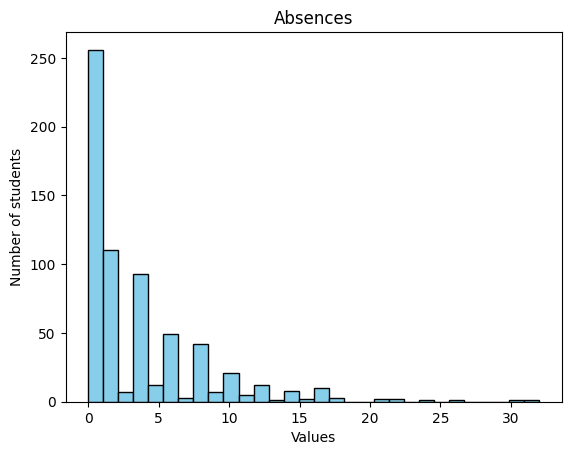

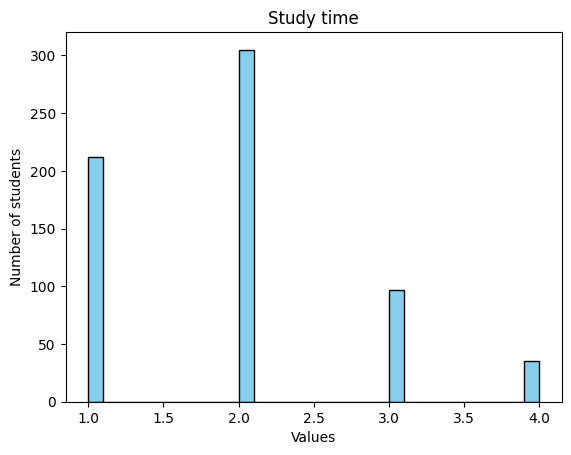

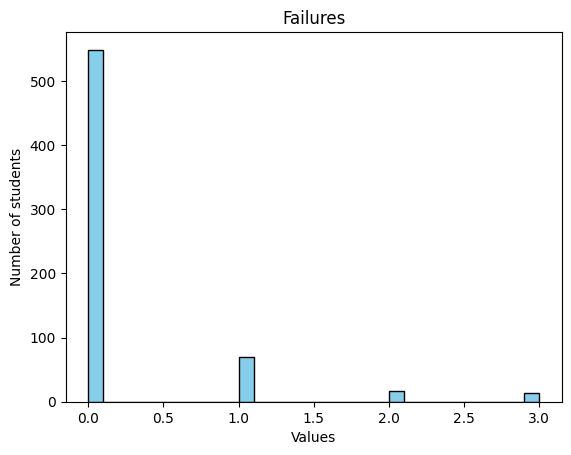

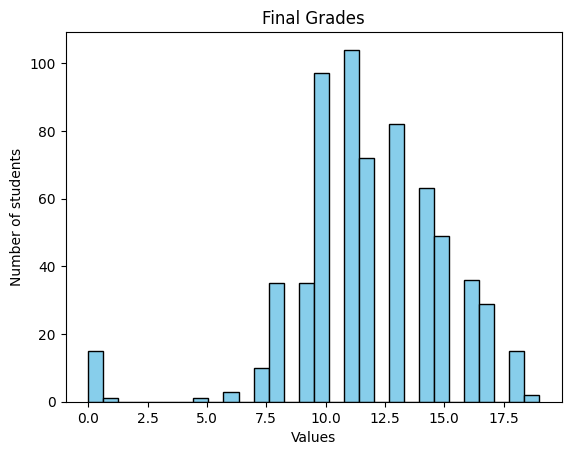

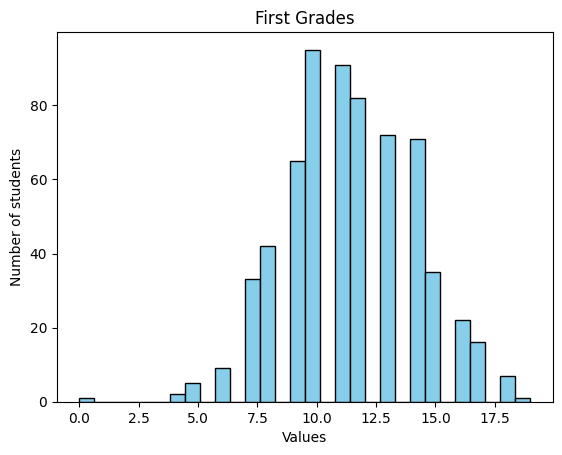

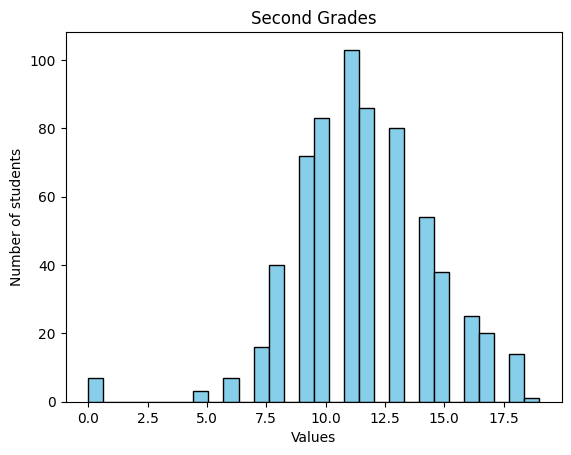

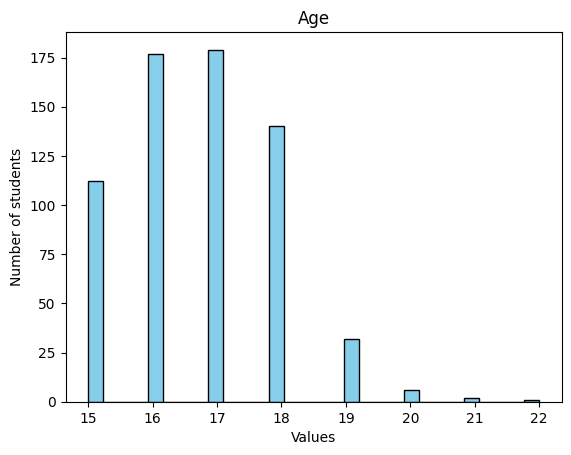

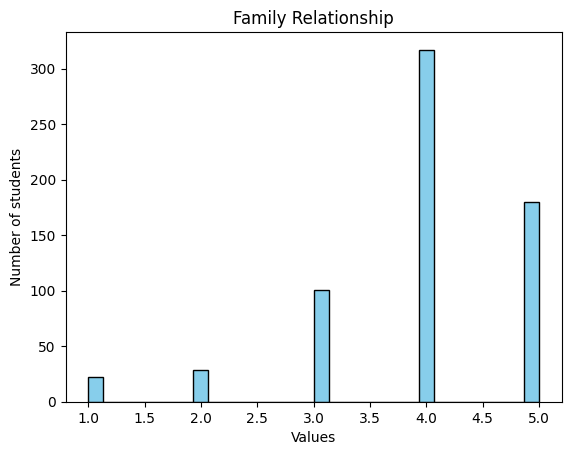

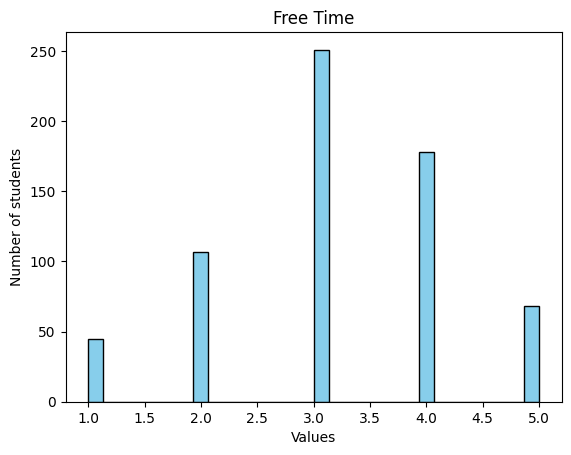

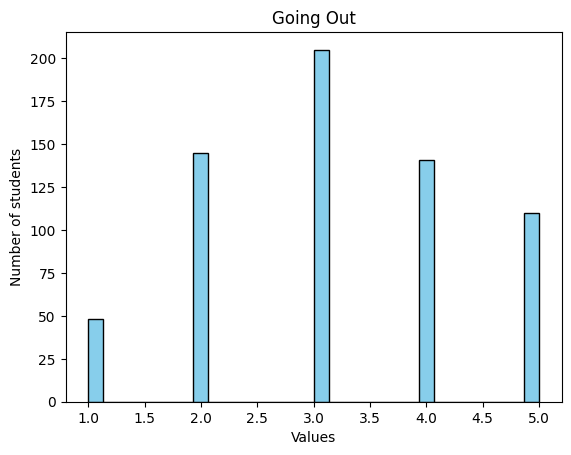

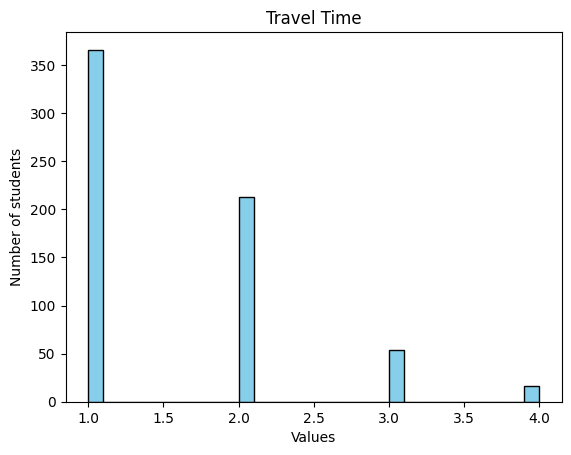

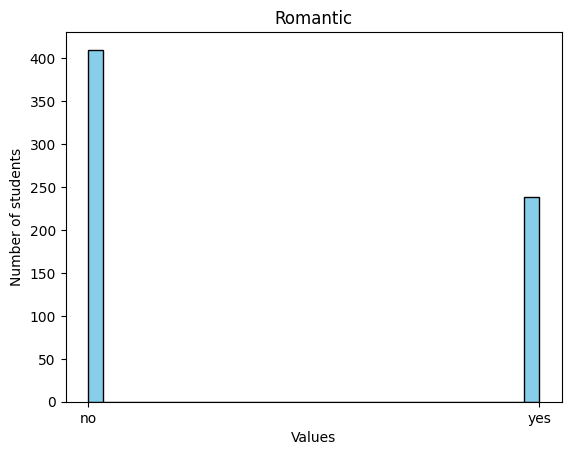

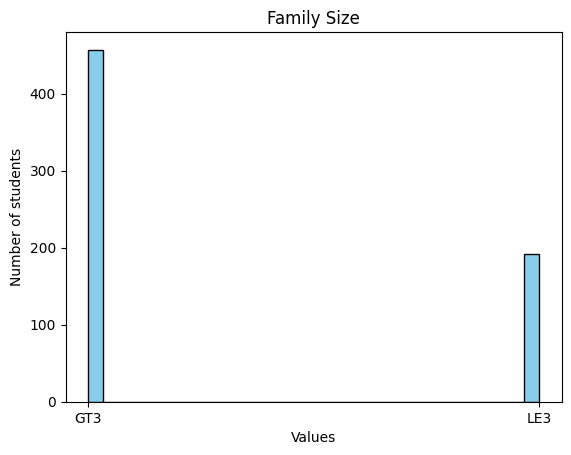

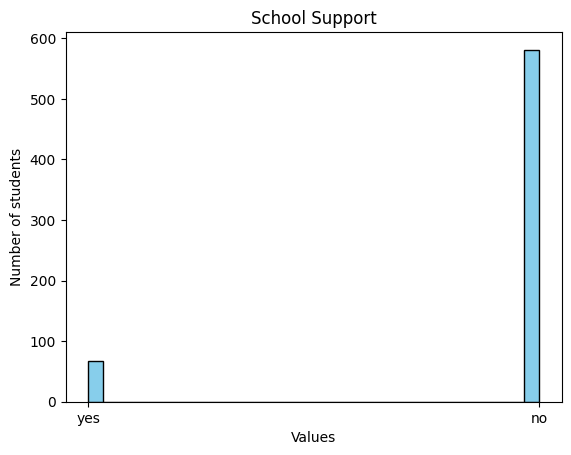

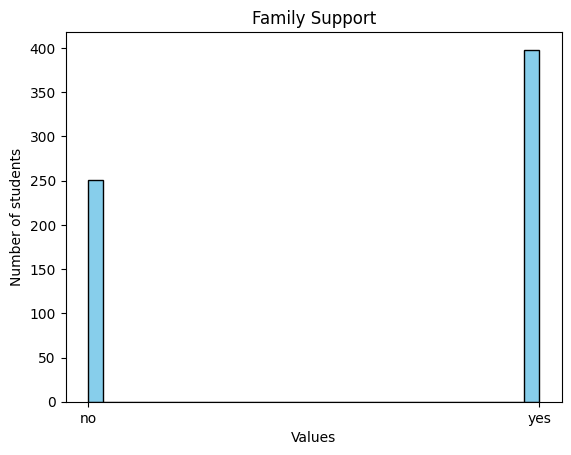

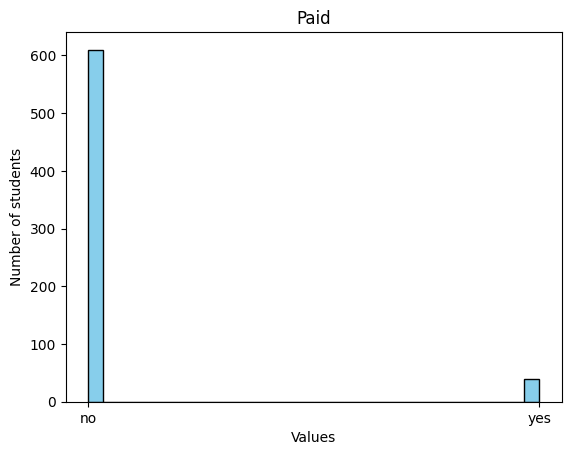

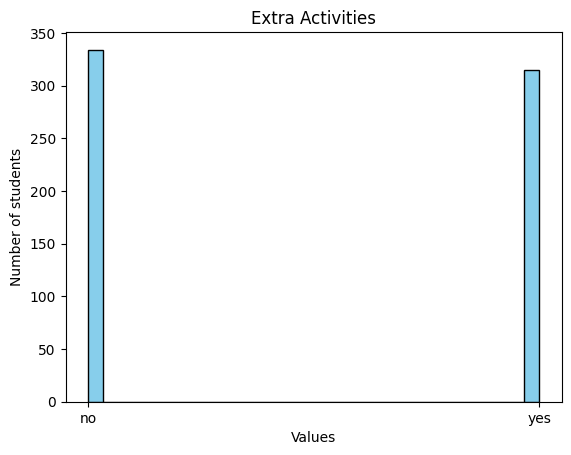

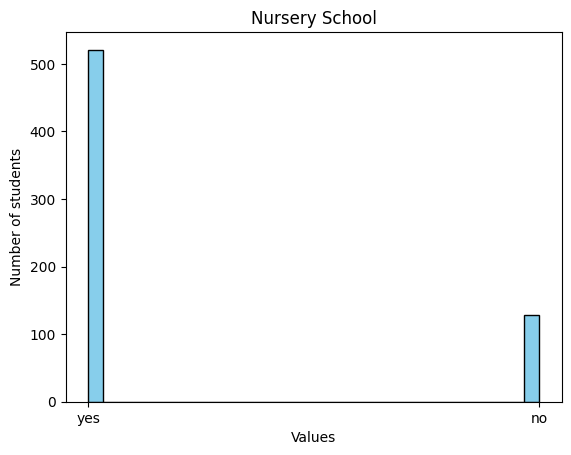

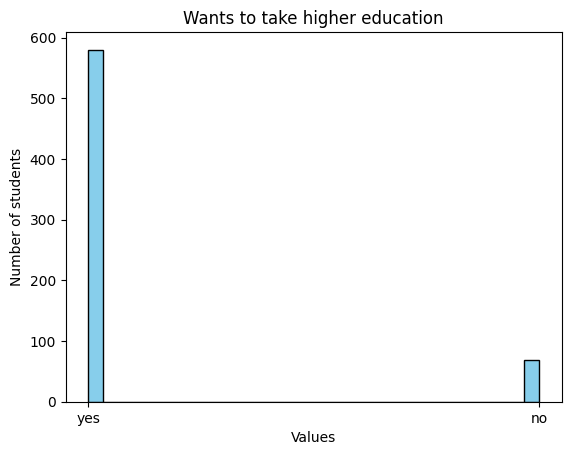

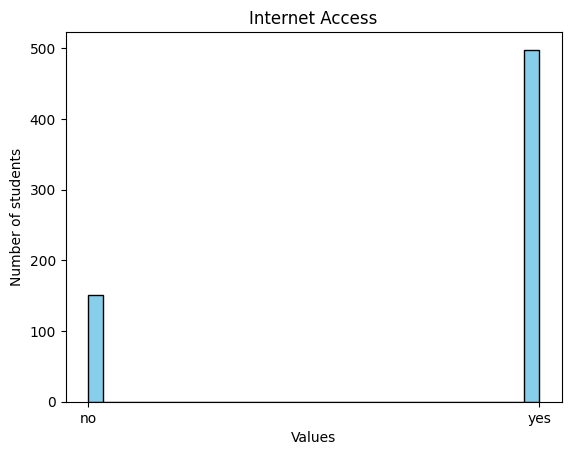

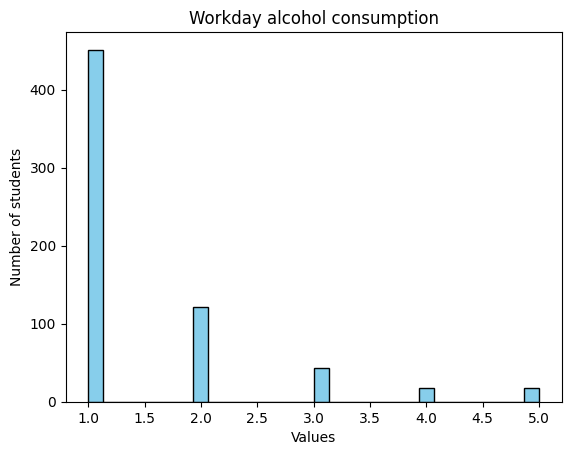

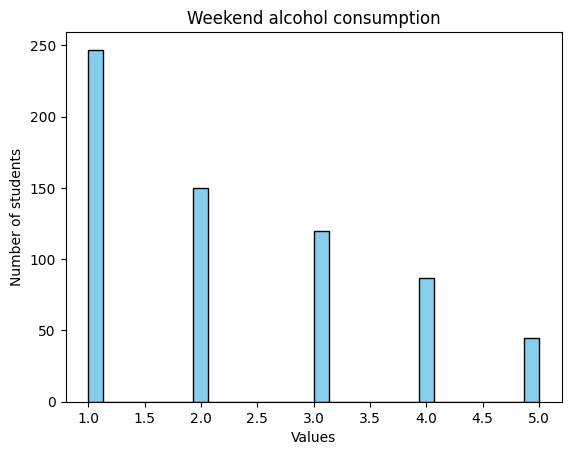

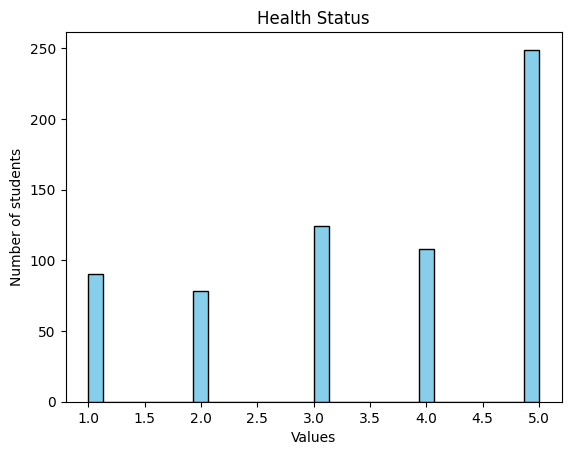

In [ ]:
#plt.hist(X[], bins=30, color='skyblue', edgecolor='black')
plt.hist(X['absences'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Absences')
plt.show()
plt.hist(X['studytime'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Study time')
plt.show()
plt.hist(X['failures'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Failures')
plt.show()
plt.hist(y['G3'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Final Grades')
plt.show()
plt.hist(y['G1'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('First Grades')
plt.show()
plt.hist(y['G2'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Second Grades')
plt.show()
plt.hist(X['age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Age')
plt.show()
plt.hist(X['famrel'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Family Relationship')
plt.show()
plt.hist(X['freetime'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Free Time')
plt.show()
plt.hist(X['goout'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Going Out')
plt.show()
plt.hist(X['traveltime'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Travel Time')
plt.show()
plt.hist(X['romantic'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Romantic')
plt.show()
plt.hist(X['famsize'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Family Size')
plt.show()
plt.hist(X['schoolsup'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('School Support')
plt.show()
plt.hist(X['famsup'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Family Support')
plt.show()
plt.hist(X['paid'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Paid')
plt.show()
plt.hist(X['activities'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Extra Activities')
plt.show()
plt.hist(X['nursery'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Nursery School')
plt.show()
plt.hist(X['higher'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Wants to take higher education')
plt.show()
plt.hist(X['internet'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Internet Access')
plt.show()
plt.hist(X['Dalc'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Workday alcohol consumption')
plt.show()
plt.hist(X['Walc'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Weekend alcohol consumption')
plt.show()
plt.hist(X['health'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of students')
plt.title('Health Status')
plt.show()




# Detecting null values

In [ ]:
F_null_values = X.isnull().sum()
print(F_null_values)
T_null_values = y.isnull().sum()
print(T_null_values)


school                 0
sex                    0
age                    0
address                0
famsize                0
Pstatus                0
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
higher                 0
internet               0
romantic               0
famrel                 0
freetime               0
goout                  0
Dalc                   0
Walc                   0
health                 0
absences               0
absences_Normalized    0
G1                     0
G2                     0
dtype: int64
G1    0
G2    0
G3    0
dtype: int64


# drop null values

In [ ]:
X = X.dropna()
y = y.dropna()


# Label Encoding

In [3]:
# made a copy just to show how factorize function work (assigns each unique category a distinct integer value)
X_copy = X.copy()
X['school'] = pd.factorize(X['school'])[0]
X['sex'] = pd.factorize(X['sex'])[0]
X['famsize'] = pd.factorize(X['famsize'])[0]
X['address'] = pd.factorize(X['address'])[0]
X['Pstatus'] = pd.factorize(X['Pstatus'])[0]
X['Mjob'] = pd.factorize(X['Mjob'])[0]
X['Fjob'] = pd.factorize(X['Fjob'])[0]
X['reason'] = pd.factorize(X['reason'])[0]
X['guardian'] = pd.factorize(X['guardian'])[0]
X['schoolsup'] = pd.factorize(X['schoolsup'])[0]
X['famsup'] = pd.factorize(X['famsup'])[0]
X['paid'] = pd.factorize(X['paid'])[0]
X['activities'] = pd.factorize(X['activities'])[0]
X['nursery'] = pd.factorize(X['nursery'])[0]
X['higher'] = pd.factorize(X['higher'])[0]
X['internet'] = pd.factorize(X['internet'])[0]
X['romantic'] = pd.factorize(X['romantic'])[0]
print({'famsize':X_copy['famsize'][:20],'famsize_Encoded': X['famsize'][:20]})


{'famsize': 0     GT3
1     GT3
2     LE3
3     GT3
4     GT3
5     LE3
6     LE3
7     GT3
8     LE3
9     GT3
10    GT3
11    GT3
12    LE3
13    GT3
14    GT3
15    GT3
16    GT3
17    GT3
18    GT3
19    LE3
Name: famsize, dtype: object, 'famsize_Encoded': 0     0
1     0
2     1
3     0
4     0
5     1
6     1
7     0
8     1
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    1
Name: famsize, dtype: int64}


<ipython-input-3-2fc8bc7e7a15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['school'] = pd.factorize(X['school'])[0]
<ipython-input-3-2fc8bc7e7a15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = pd.factorize(X['sex'])[0]
<ipython-input-3-2fc8bc7e7a15>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

# Removing outliers using Z-score

In [4]:
numeric_cols = X.select_dtypes(include=np.number).columns
X_numeric = X[numeric_cols]
X_zscore = X_numeric[(np.abs(stats.zscore(X_numeric)) < 4).all(axis=1)] # Setting threshold and filter outliers
# remove outliers from both datasets
X = X[X.index.isin(X_zscore.index)]
y = y[y.index.isin(X_zscore.index)]


# Data Normalization using Z-Score Scaler and Min-Max Scaler

---



In [5]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

X['absences'] = scaler.fit_transform(X[['absences']])
X['age'] = (X['age'] - 15) / (22 - 15)

<ipython-input-5-83a841fb880c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['absences'] = scaler.fit_transform(X[['absences']])
<ipython-input-5-83a841fb880c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = (X['age'] - 15) / (22 - 15)


# Feature Selection using sklearn library

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression ,chi2
import seaborn as sns
if 'G1' and 'G2' not in X.columns:
    X = pd.concat((X, y[['G1','G2']]), axis=1)

#feature selection using statistics
selector = SelectKBest(score_func=f_regression, k=7) # selecting features with best results
X_new = selector.fit_transform(X , y['G3'])
selected_features = X.columns[selector.get_support()]
print(f'Selected Features :  {selected_features}')
print(f'All Features : {selector.feature_names_in_}')
print(selector.scores_)





Selected Features :  Index(['school', 'Medu', 'studytime', 'failures', 'higher', 'G1', 'G2'], dtype='object')
All Features : ['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'reason' 'guardian' 'traveltime' 'studytime' 'failures'
 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet'
 'romantic' 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences'
 'G1' 'G2']
[5.65777173e+01 9.42699592e+00 3.73987739e+00 1.78583359e+01
 5.19838075e-01 1.06684561e-01 3.77523883e+01 2.55220772e+01
 1.31920448e+01 1.67783476e+00 1.67528528e+01 5.56565497e-02
 1.04878865e+01 3.95785887e+01 1.12651108e+02 3.01174488e+00
 2.37170129e+00 1.58811277e+00 3.75655797e+00 1.22402370e-01
 6.60584648e+01 1.22990179e+01 3.81909446e+00 2.08471506e+00
 6.44282637e+00 4.61378725e+00 2.80587508e+01 1.82994772e+01
 8.98516816e+00 6.25087916e+00 1.35045761e+03 3.29023711e+03]


# Correlation Analysis with Heatmap

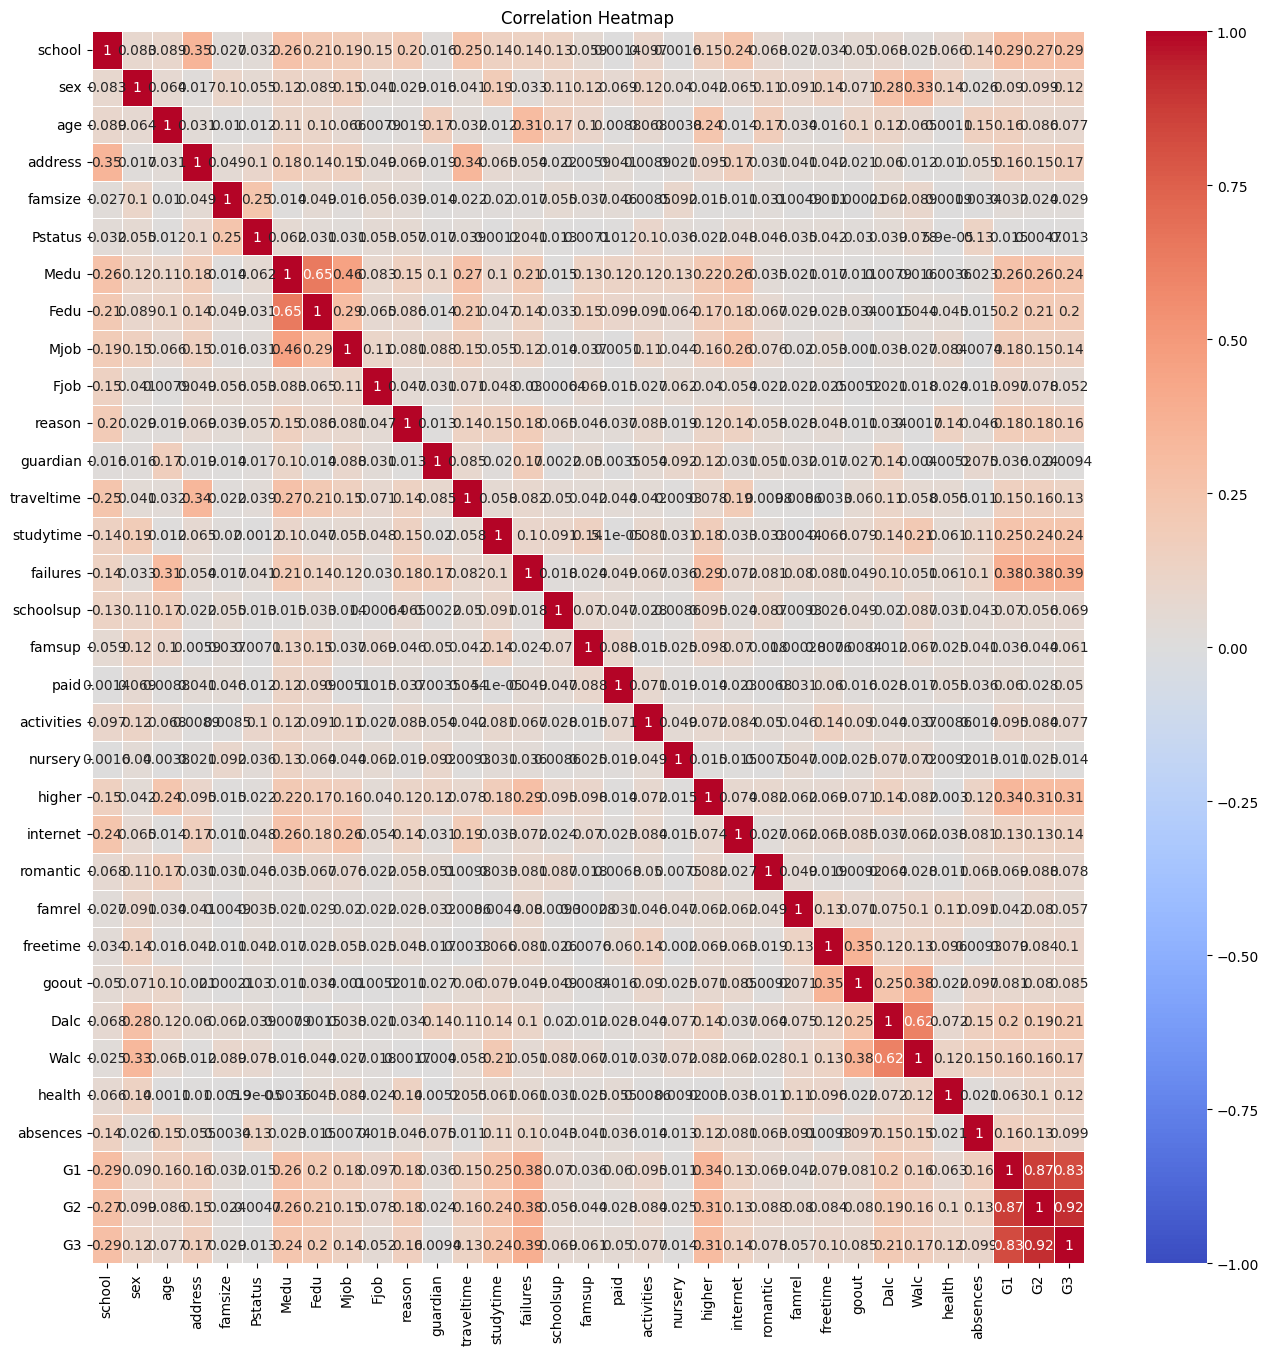

In [13]:
matrix = pd.concat((X, y['G3']), axis=1)
corr_matrix = matrix.corr().abs()
corr_df = pd.DataFrame(corr_matrix)
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',vmin=-1,vmax=1,linewidths=0.5) #plotting heatmap
plt.title('Correlation Heatmap')
plt.show()

# Linear Regression model
# MSE Evalution with Accuracy
# Coefficient Analysis

**higher absolute value of Coefficient means that feature have better score.**

**(positive = Direct relation , nagative = indirect relation)**




In [33]:
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_new, y['G3'], test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
X_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(X_results)
# MSE And RMSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
# R2 Score
r2 = r2_score(y_test, y_pred)
print(f'Accuracy: {r2*100}')

coef_df = pd.DataFrame({'Feature': X.columns[selector.get_support()], 'Coefficient': model.coef_})
print(coef_df)





     Actual  Predicted
403      15  15.249440
451      11  11.227197
323      10  10.363991
260      11  11.447408
494       9   9.035504
..      ...        ...
178       8   8.365809
594      18  18.299664
240      17  18.465264
381      15  14.658258
474      11  11.160567

[127 rows x 2 columns]
Mean Squared Error: 0.5358696878051509
Root Mean Squared Error: 0.7320312068519694
Accuracy: 93.52076359515333
     Feature  Coefficient
0     school    -0.233195
1       Medu    -0.042293
2  studytime     0.066629
3   failures    -0.311011
4     higher    -0.166133
5         G1     0.109889
6         G2     0.902891


# K-fold cross validation

In [19]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

kf = KFold(n_splits=5, shuffle=True, random_state=0)
model = LinearRegression()
mse_scores = -cross_val_score(model, X_new, y['G3'], cv=kf, scoring='neg_mean_squared_error')
print(f'MSE Scores: {mse_scores}')
print(f'Mean MSE: {mse_scores.mean()}')
print(f'Standard Deviation: {mse_scores.std()}')



MSE Scores: [0.53586969 3.07360673 1.6742795  1.56365221 1.29279744]
Mean MSE: 1.6280411141005668
Standard Deviation: 0.824763072294004


# in the end i tried to maximize accuracy by using different number of features and training size and ... to improve this model we can use more complex model  